In [7]:
import pandas as pd
import numpy as np
from myst_nb import glue
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
import geopandas as gpd

# this defines the css rules for the note-book table displays
header_row = {'selector': 'th:nth-child(1)', 'props': f'background-color: #FFF; text-align:right'}
even_rows = {"selector": 'tr:nth-child(even)', 'props': f'background-color: rgba(139, 69, 19, 0.08);'}
odd_rows = {'selector': 'tr:nth-child(odd)', 'props': 'background: #FFF;'}
table_font = {'selector': 'tr', 'props': 'font-size: 14px;'}
table_data = {'selector': 'td', 'props': 'padding: 14px;'}
table_caption = {'selector': 'caption', 'props': 'font-size: 14px; font-style: italic; caption-side: bottom; text-align: left; margin-top: 10px'}
table_css_styles = [even_rows, odd_rows, table_font, header_row, table_caption]


table_large_data = {'selector': 'tr', 'props': 'font-size: 14px; padding: 12px;'}
table_large_font = [even_rows, odd_rows, table_large_data, header_row, table_caption]

hl1 = pd.read_csv('resources/data/checks/hist_leman.csv')
hl2 = pd.read_csv('resources/data/u_all_data.csv')
hl2 = hl2[hl2.water_name_slug == 'lac-leman'].copy()

yu = [
    'canton',
    'orchards',
    'vineyards',
    'buildings',
    'forest',
    'undefined',
    'public_services',
    'streets'
   
]

t = hl1[hl1.location == 'maladaire'][yu][:1]
missing = hl2[hl2.loc_date == "('maladaire', '2021-06-02')"].copy()
new_column = {'loc_date':'sample_id', 'water_name_slug':'feature_name', 'water':'feature_type', 'river_bassin':'parent_boundary', 'pcs_m':'pcs/m'}
missing.rename(columns=new_column, inplace=True)
missing['project'] = 'IQAASL'
missing.loc[missing.location == 'maladaire', yu] = t.values[0]
p_plastock = pd.concat([hl1, missing])

work_data = p_plastock.drop_duplicates(["sample_id", "code"])
work_data.loc[work_data.location == 'preverenges', 'region'] = 'Grand lac'
work_data.loc[work_data.location == 'vidy', 'region'] = 'Grand lac'
work_data.loc[work_data.location == 'tolochenaz', 'region'] = 'Grand lac'
work_data.loc[work_data.location == 'maladaire', 'region'] = 'Haut lac'
work_data.loc[work_data.location == 'versoix', 'region'] = 'Petit lac'

work_data.to_csv('resources/data/checks/hist_leman.csv', index=False)
# work_data['date'] = pd.to_datetime(work_data['date'], format='%Y-%m-%d')
# work_data = work_data[work_data.code == "G70"].copy()

In [8]:
shotgun = work_data[work_data.code == 'G70'].copy()

mask1 = (shotgun['date'] < '2016-11-15')
mask2 = (shotgun['date'] >= '2017-04-01') & (shotgun['date'] <= '2020-03-31')
mask3 = (shotgun['date'] >= '2020-04-01') & (shotgun['date'] <= '2021-05-31')

In [9]:
ps = pd.read_csv('resources/data/macro_data_linearm.csv')
ps = ps[ps.code == 'G70'].copy()

In [10]:
ps.slug.unique()

array(['anthy', 'aubonne', 'baby-plage', 'crans', 'cully', 'excenevex',
       'gland', 'grangettes', 'hermance', 'lugrin', 'lutry', 'meillerie',
       'pichette', 'port-choiseul', 'preverenges', 'rolle', 'savonniere',
       'tolochenaz', 'tougues', 'versoix', 'amphion', 'bouveret',
       'clarens', 'saint-disdille', 'vidy'], dtype=object)

# Plastic shotgun shell wadding

__A summary of observations on Lac Léman__

Plastic wadding is commonly used in modern shotgun shells due to its durability and consistency in performance. It helps to cushion the shot or slug as it moves down the barrel, ensuring it stays centered and providing a proper seal to maximize the energy transfer upon firing.

Plastic wadding can come in various forms, such as wads or cups, and they can have different designs depending on the specific requirements of the shotgun shell and the desired performance characteristics.

When plastic wadding is left behind after shooting activities or improperly disposed of, it can find its way into water bodies and eventually wash up on beaches. Once there, it can pose risks to wildlife through ingestion or entanglement.


## Sampling campaigns 2015 - 2022

Plastic shotgun wadding has been identified in every major sampling campaign in the Léman region since monitoring of plastics began.

1. Montreux Clean Beach Project (MCBP): November 2015 - November 2016. Sampling campaign  by local organization
2. Swiss Litter Report (SLR): April 2017 - May 2018. Sampling campaign by the WWF Switzerland.
3. Identification Qauntitification of Anthropogenc Litter Switzerlnd (IQAASL): April 2020 - May 2021. Sampling campaign mandated by the Swiss confederation. 
4. Pla'stock: January 2022 - December 2022. Sampling campaign by Association pour la Sauvegard du Léman.

### Essential statistics: 2015 - 2021

In [11]:
quantiles = [0.05, 0.25, 0.5, 0.75, 0.95]

start_date, end_date = shotgun["date"].min(), shotgun['date'].max()
nsamples = len(shotgun)
ncities = shotgun.city.nunique()
nlocations = shotgun.location.nunique()

qty = shotgun.quantity.sum()
fail_rate = np.mean(shotgun.quantity > 0)
found_qtle = np.quantile(shotgun.quantity.values, quantiles)
density_qtle = np.quantile(shotgun['pcs/m'].values, quantiles)
dqtle = {quantiles[i]: int(x * 100) for i, x in enumerate(density_qtle)}
found_median, found_mean = shotgun.quantity.median(), shotgun.quantity.mean()

median_density, average_density = shotgun['pcs/m'].median(), shotgun['pcs/m'].mean()

summary_2015_2021 = f"""

From {start_date} to {end_date} a total of {qty} plastic waddings (PW) were found in {nsamples} separate samples. The samples were from {nlocations} different locations,
representing {ncities} different municipalities and three cantons. PW were indentified in {int(fail_rate * 100)}% of samples. The average number found per sample was {int(found_mean)}, 
the median found was {found_median}. Which means that for any given visit to the shoreline on Lake Geneva we found at leat 1 PW 50% of the time and it
was not uncommon to find more.

On a per meter basis (pcs/m) we found 1 PW for every ten meters or 10 for 100. The median rate was 2 for every 100 meters. Values in excess of
50 PW per 100 meters were encountered less than 5% of the time.
"""

Markdown(summary_2015_2021)



From 2015-11-23 to 2021-11-14 a total of 949 plastic waddings (PW) were found in 250 separate samples. The samples were from 38 different locations,
representing 15 different municipalities and three cantons. PW were indentified in 54% of samples. The average number found per sample was 3, 
the median found was 1.0. Which means that for any given visit to the shoreline on Lake Geneva we found at leat 1 PW 50% of the time and it
was not uncommon to find more.

On a per meter basis (pcs/m) we found 1 PW for every ten meters or 10 for 100. The median rate was 2 for every 100 meters. Values in excess of
50 PW per 100 meters were encountered less than 5% of the time.


### Essential statistics: 2022

In 2022, contrary to the previous sampling campaigns, the french side of the lake was also sampled according to same protocol as the previous years.

In [12]:
quantiles = [0.05, 0.25, 0.5, 0.75, 0.95]

start_date, end_date = ps["date"].min(), ps['date'].max()
nsamples = len(ps)
# ncities = ps.city.nunique()
nlocations = ps.slug.nunique()

qty = ps['quantité'].sum()
fail_rate = np.mean(ps['quantité'] > 0)
found_qtle = np.quantile(ps['quantité'].values, quantiles)
density_qtle = np.quantile(ps['pcs/m'].values, quantiles)
dqtle = {quantiles[i]: int(x * 100) for i, x in enumerate(density_qtle)}
found_median, found_mean = ps['quantité'].median(), ps['quantité'].mean()

median_density, average_density = ps['pcs/m'].median(), ps['pcs/m'].mean()


summary_2022 = f"""

From {start_date} to {end_date} a total of {qty} plastic waddings (PW) were found in {nsamples} separate samples. The samples were from {nlocations} different locations,
representing {nlocations -1} different municipalities and three cantons (Switzerland) and one department (France). PW were indentified in {int(fail_rate * 100)}% of samples. The average number found per sample was {int(found_mean)}, 
the median found was {found_median}. Which means that we found a PW in 4/10 samples or we had a 40% chance of finding at least one for each visit to the shoreline. Values in excess of 9 PW for 100 meters of
shoreline were encountered less than 5% of the time. Both of these results are lower than the period 2015 - 2021.

"""

Markdown(summary_2022)



From 2022-01-10 to 2022-12-17 a total of 199 plastic waddings (PW) were found in 98 separate samples. The samples were from 25 different locations,
representing 24 different municipalities and three cantons (Switzerland) and one department (France). PW were indentified in 38% of samples. The average number found per sample was 2, 
the median found was 0.0. Which means that we found a PW in 4/10 samples or we had a 40% chance of finding at least one for each visit to the shoreline. Values in excess of 9 PW for 100 meters of
shoreline were encountered less than 5% of the time. Both of these results are lower than the period 2015 - 2021.



In [13]:
# Create a GeoDataFrame from the list of locations
cantons = ['Vaud', 'Valais', 'Genève']
dbc = gpd.read_file('data/ignorethis/shapes/kantons.shp')
dbc = dbc.to_crs(epsg=4326)
dbc = dbc[dbc.NAME.isin(cantons)].copy()
dbckey = dbc[['NAME', 'KANTONSNUM']].set_index('NAME')
dbckey = dbckey.drop_duplicates()
thiscanton = dbckey.loc[cantons, 'KANTONSNUM']
db = gpd.read_file('data/ignorethis/shapes/municipalities.shp')
db = db.to_crs(epsg=4326)
thesecities = db[db.KANTONSNUM.isin(thiscanton.values)]
surveyedcities = all_data_of_interest.city.unique()

bounds = dbc.total_bounds
minx, miny, maxx, maxy = 6.0, 46.1, 7.0, 46.8


rivers = gpd.read_file('data/ignorethis/shapes/rivers.shp')
rivers = rivers.to_crs(epsg=4326)
# Filter the background layer to cover the bounding box
rivers_within_bounds = rivers.clip(dbc, keep_geom_type=True) # cx[minx:maxx, miny:maxy]


lakes = gpd.read_file('data/ignorethis/shapes/lakes.shp')
lakes = lakes.to_crs(epsg=4326)
lakes_within_bounds = lakes.clip(dbc, keep_geom_type=True) # [minx:maxx, miny:maxy]

# Define the plot
fig, ax = plt.subplots(figsize=(12,10))
ax.set_xlim(6.1, 7.1)
ax.set_ylim(46.1, 46.7)

citymap = thesecities.plot(ax=ax, edgecolor='black', facecolor='None', linewidth=.1)

surveyed = thesecities[thesecities.NAME.isin(surveyedcities)].plot(ax=ax, color='salmon', alpha=0.6)

dbc.plot(ax=ax, edgecolor='black', facecolor='None', linewidth=.4)
rivers_within_bounds.plot(ax=ax, edgecolor='dodgerblue', alpha=.4)
lakes_within_bounds.plot(ax=ax, edgecolor='dodgerblue', color='dodgerblue', linewidth=.2, alpha=.4)

# lakes = lake_report.sample_results()
# prior_samples = lake_prior_report.sample_results()

# lakes_locations,  map_boundsa = map_markers(lakes, lat_lon)
# lakes_locations.plot(ax=ax, color= session_config.palette['likelihood'], markersize=80, zorder=5)

# prior_locations,  map_boundsb = map_markers(prior_samples, lat_lon)
# prior_locations.plot(ax=ax, color= session_config.palette['prior'], marker='x', markersize=80, zorder=5)

ax.set_title(f'Survey locations {report_name}')
plt.xlabel('')
plt.ylabel('')

plt.axis('off')



legend_elements = [
    Line2D([0], [0], marker='o', label='After 2020', markersize=10, markeredgecolor='w', markerfacecolor= session_config.palette['likelihood']),
    Line2D([0], [0], marker='x', label='Before 2020', markersize=10, markeredgecolor= session_config.palette['prior'])
]

plt.legend(handles=legend_elements, loc='upper right')

glue('map-of-survey-locations', fig, display=True)
plt.close()

DriverError: data/ignorethis/shapes/kantons.shp: No such file or directory

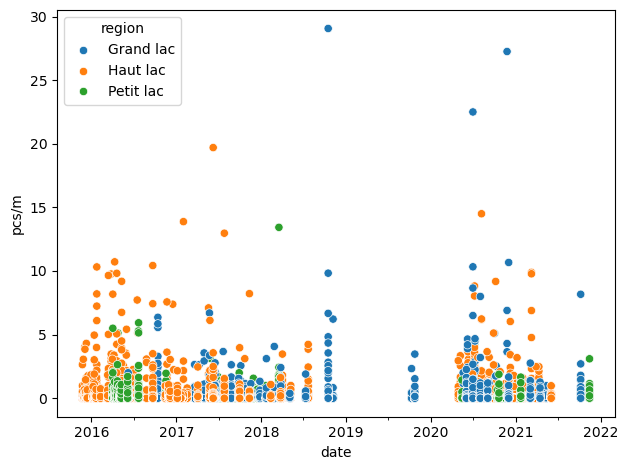

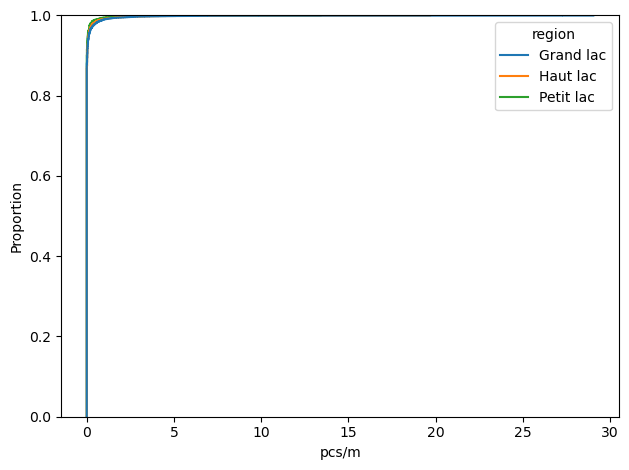

In [9]:
work_data['date'] = pd.to_datetime(work_data['date'], format='%Y-%m-%d')
fig, ax = plt.subplots()
sns.scatterplot(data=work_data, x='date', y='pcs/m', hue='region')
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=(1, 7)))
ax.xaxis.set_major_locator(mdates.YearLocator())
plt.tight_layout()
glue('region_scatter', fig, display=True)
plt.close()

fig, ax = plt.subplots()
sns.ecdfplot(data=work_data, x="pcs/m", hue='region')
plt.tight_layout()
glue('region_ecdf', fig, display=True)
plt.close()

### Characteristics and weight of sampling conditions

We assume there is a relationship between how the land is used and what it is we find on the ground. Archeaologists and Anthropologists make this basic assumption every time they undertake an excavation and interpret the results in the context of other findings. This interpretation of beach litter data does exactly the same. As discussed in [Near or far](https://hammerdirt-analyst.github.io/landuse/titlepage.html) and the federal report [IQAASL](https://hammerdirt-analyst.github.io/IQAASL-End-0f-Sampling-2021/) : at the national level there is strong evidence to support a correlation between the density of objects found and specific topographic features that can be isolated on a standard topographical map.

Here we consider the following features as a % of the dry-land surface area within 1 500 meters of the survey location:

1. Buildings: the surface area attributed to constructed spaces
2. Forest: the surface are attributed to woods and forest
3. Orchards: the surface area attributed to orchards
4. Public services: the surface area attributed to any area that is associated to public use, includes hospitals, sports fields, schools etc.
5. Undefined: the surface area has no defined use
6. Vineyards: the surface area attributed to growing grapes for wine making

### Categories

The magnitued of the land-use features are divided into categories: 1 - 5. Each category represents the relative magnitude of the land use conditions, as a % of the available dryland from a surface area that is equal to a circle with of radius 1'500 metres centered at the survey location: a buffer zone. The term dry-land refers to the available surface area of the buffer zone that is not covered with water.

Consider the tables 1 and 2. The % of samples that were conducted in locations with the least amount of surface area dedicated to orchards is 91% (table 1), the average pieces per meter for locations with that attribute was 0.11 (table 2).



For a detailed description of how these values are derived: [Extracting land-use values](https://hammerdirt-analyst.github.io/feb_2024/landuse_model_next_itteration.html)

In [7]:
normalized_columns = ['orchards', 'vineyards', 'buildings', 'forest', 'undefined', 'public_services']
ranked_cols = [f'{x}_rank' for x in normalized_columns]
agg = ['mean', 'count']
cols = {'mean': 'average_pcs/m', 'count': 'number_of_samples'}
val = 'pcs/m'

work_data = work_data.copy()
# divide into 5 bins from 0 to 1
for col in normalized_columns:
    work_data[col + '_rank'] = pd.cut(work_data[col], bins=5, labels=range(1, 6))

#average pcs/m and number of samples per category of buildings
buildings = work_data.groupby('buildings_rank', observed=True)[val].agg(agg).reset_index().rename(columns=cols)
bdng = buildings.set_index('buildings_rank', drop=True).style.set_table_styles(table_css_styles).format(precision=2)

forests = work_data.groupby('forest_rank', observed=True)[val].agg(agg).reset_index().rename(columns=cols)
frst = forests.set_index('forest_rank', drop=True).fillna('-').style.set_table_styles(table_css_styles).format(precision=2)

undefined = work_data.groupby('undefined_rank', observed=True)[val].agg(agg).reset_index().rename(columns=cols)
undf = undefined.set_index('undefined_rank', drop=True).fillna('-').style.set_table_styles(table_css_styles).format(precision=2)

orchards = work_data.groupby('orchards_rank', observed=True)[val].agg(agg).reset_index().rename(columns=cols)
orch = orchards.set_index('orchards_rank', drop=True).fillna('-').style.set_table_styles(table_css_styles).format(precision=2)

public_services = work_data.groupby('public_services_rank', observed=True)[val].agg(agg).reset_index().rename(columns=cols)
pubs = public_services.set_index('public_services_rank', drop=True).fillna('-').style.set_table_styles(table_css_styles).format(precision=2)

vineyards = work_data.groupby('vineyards_rank', observed=True)[val].agg(agg).reset_index().rename(columns=cols)
vines = vineyards.set_index('vineyards_rank', drop=True).fillna('-').style.set_table_styles(table_css_styles).format(precision=2)

ps = {}
for feature in ranked_cols:
    ps[feature] = work_data[feature].value_counts(normalize=True)

samples_feature = pd.DataFrame(ps)
samples_feature.columns = normalized_columns

caption = "<b>Table 1:</b> Percent of samples collected with the designated land-use feature and category."
sd = samples_feature.style.set_table_styles(table_css_styles).format('{:.0%}').set_caption(caption)
glue('percent_samps_feature', sd, display=True)

,orchards,vineyards,buildings,forest,undefined,public_services
1,91%,92%,11%,72%,63%,68%
2,6%,7%,6%,14%,25%,7%
3,0%,0%,1%,0%,1%,7%
4,1%,0%,20%,9%,2%,8%
5,1%,1%,62%,5%,9%,10%


In [8]:
d = pd.melt(work_data, value_vars=ranked_cols, id_vars=['pcs/m', 'sample_id'])
di = d.groupby(['variable', 'value'], as_index=False, observed=True)['pcs/m'].mean()
di = di.pivot(columns='variable', index='value', values='pcs/m')
di.columns = [x[:-5] for x in di.columns]
di.index.name = None
caption = "<b>Table 2:</b> The average number of shotgun shells per linear meter of shoreline by feature and category."
sd = di.style.set_table_styles(table_css_styles).format(precision=2, na_rep='-').set_caption(caption)
glue('average_per_feature', sd, display=True)

,buildings,forest,orchards,public_services,undefined,vineyards
1,0.02,0.04,0.04,0.04,0.04,0.04
2,0.09,0.02,0.03,0.03,0.04,0.02
3,0.03,-,0.01,0.02,0.02,-
4,0.02,0.02,0.02,0.06,0.02,0.04
5,0.04,0.10,0.03,0.06,0.02,0.02


::::{grid} 1

:::{grid-item}

{glue}`percent_samps_feature`

:::

:::{grid-item}

{glue}`average_per_feature`

:::
::::

### Regional results

Lake Geneva is divided into three parts because of its different types of formation (sedimentation, tectonic folding, glacial erosion):

* Haut Lac ('Upper Lake'), the eastern part from the Rhône estuary to the line of Meillerie–Rivaz
* Grand Lac ('Large Lake'), the largest and deepest basin with the lake's largest width
* Petit Lac ('Small Lake'), the most south-west, narrower and less deep part from Yvoire–Promenthoux next Prangins to the exit in Geneva

For a brief description of the geography of Lac Léman see: [Wikepedia Lake Geneva](https://en.wikipedia.org/wiki/Lake_Geneva)

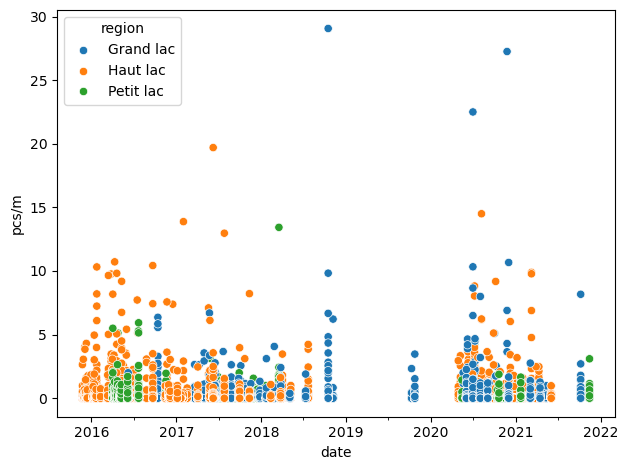

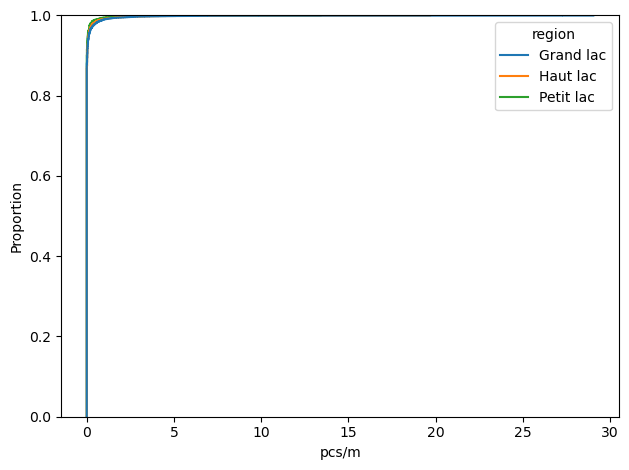

In [9]:
work_data['date'] = pd.to_datetime(work_data['date'], format='%Y-%m-%d')
fig, ax = plt.subplots()
sns.scatterplot(data=work_data, x='date', y='pcs/m', hue='region')
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=(1, 7)))
ax.xaxis.set_major_locator(mdates.YearLocator())
plt.tight_layout()
glue('region_scatter', fig, display=True)
plt.close()

fig, ax = plt.subplots()
sns.ecdfplot(data=work_data, x="pcs/m", hue='region')
plt.tight_layout()
glue('region_ecdf', fig, display=True)
plt.close()

::::{grid} 1

:::{grid-item-card}

{glue}`region_scatter`

+++
<b>Figure 1:</b> Survey totals in number of shotgun shell waddings per linear meter of shoreline, November 2015 - December 2021.
:::

:::{grid-item-card}

{glue}`region_ecdf`

+++
<b>Figure 2:</b> The empirical cumulative distribution (ECDF) of the survey results.
:::
::::

In [10]:
# regional results
regions = work_data.groupby('region').quantity.describe()
regions.rename(columns={'count':'nsamples'}, inplace=True)
regions.index.name = None
caption = "The distribution of the total number of plastic shotgun wadding found per sample for each region"
rg = regions.style.set_table_styles(table_css_styles).format(precision=0).set_caption(caption)
glue('region_qty_dist', rg, display=True)

# regional results
regions = work_data.groupby('region')['pcs/m'].describe()
regions.rename(columns={'count':'nsamples'}, inplace=True)
regions.index.name = None
caption = "The distribution of the number of shotgun wadding found per meter of shoreline"
rg = regions.style.set_table_styles(table_css_styles).format(precision=2).set_caption(caption)
glue('region_med_dist', rg, display=True)

,nsamples,mean,std,min,25%,50%,75%,max
Grand lac,13097,1,12,0,0,0,0,545
Haut lac,30912,2,14,0,0,0,0,729
Petit lac,12431,1,10,0,0,0,0,463


,nsamples,mean,std,min,25%,50%,75%,max
Grand lac,13097.00,0.05,0.53,0.00,0.00,0.00,0.00,29.06
Haut lac,30912.00,0.04,0.37,0.00,0.00,0.00,0.00,19.70
Petit lac,12431.00,0.02,0.22,0.00,0.00,0.00,0.00,13.43


::::{grid} 1

:::{grid-item-card}
<b>Table 3:</b> The qauntile range of the number of plastic shotgun shells found per meter of shoreline by region.
^^
{glue}`region_med_dist`

:::
::::

### Municipal results

There are numerous municipalities on the lake, here we consider only the municipalities that were sampled.

In [11]:
# cities with more than two samples and none were found
two_or_more_samples = work_data.groupby('city').filter(lambda x: len(x) >= 2)
cumulative_sum = two_or_more_samples.groupby('city')['quantity'].sum()
total = len(cumulative_sum[cumulative_sum == 0])

# locations where none were found
by_city = work_data.groupby('city')['quantity'].sum()
cities_with_none = by_city[by_city == 0].index

print(f'Nummber of cities with two or more samples where none were found: {total}\n')
print(f'Cities where none were found, for all cities and number of samples: {cities_with_none.values}')

Nummber of cities with two or more samples where none were found: 0

Cities where none were found, for all cities and number of samples: []


__Municipal results in descending order__

In [12]:
# cities with the highest density

city_pcs_m = work_data.groupby('city', as_index=False).agg({'pcs/m':'mean', 'sample_id':'nunique'})
cpm = city_pcs_m.rename(columns={'sample_id':'nsamples'}, inplace=True)
cpm = city_pcs_m.sort_values(by='pcs/m', ascending=False).set_index('city', drop=True)
cpm.index.name = None
cp = cpm.style.set_table_styles(table_css_styles).format(precision=2)
glue('city_rankings', cp, display=True)

,pcs/m,nsamples
Saint-Gingolph,0.10,13
Saint-Sulpice (VD),0.08,15
Lausanne,0.05,20
La Tour-de-Peilz,0.05,25
Rolle,0.04,1
Vevey,0.04,44
Allaman,0.03,3
Montreux,0.03,53
Préverenges,0.03,15
Genève,0.03,29


## Essential statistics: 2022

In [13]:
work_data2 = pd.read_csv('resources/data/macro_data_linearm.csv')
work_data2 = work_data2[work_data2.code == "G70"].copy()

beaches = pd.read_csv('resources/data/u_iq_ps_beaches.csv')
beaches.loc[beaches.location == 'Savonière', 'location'] = "Savonnière"
beaches.drop_duplicates('location', inplace=True)
city_map = beaches[['location', 'city']].copy()
city_map = city_map[city_map.city != 'Vidy']
# city_map.drop_duplicates(['location', 'city'], inplace=True)
city_map.set_index('location', drop=True, inplace=True)
work_data2['city'] = work_data2.Plage.apply(lambda x: city_map.loc[x]['city'])
new_columns = {"échantillon":"sample_id", 'quantité':'quantity', 'slug':'location'}
work_data2.rename(columns=new_columns, inplace=True)

In [14]:
quantiles = [0.05, 0.25, 0.5, 0.75, 0.95]

start_date, end_date = work_data2["date"].min(), work_data2['date'].max()
nsamples = len(work_data2)
ncities = work_data2.city.nunique()
nlocations = work_data2.location.nunique()

qty = work_data2.quantity.sum()
fail_rate = np.mean(work_data2.quantity > 0)
found_qtle = np.quantile(work_data2.quantity.values, quantiles)
density_qtle = np.quantile(work_data2['pcs/m'].values, quantiles)
dqtle = {quantiles[i]: int(x * 100) for i, x in enumerate(density_qtle)}
found_median, found_mean = work_data2.quantity.median(), work_data2.quantity.mean()

median_density, average_density = work_data2['pcs/m'].median(), work_data2['pcs/m'].mean()




print(f'Effective dates from {start_date} to {end_date}\n')
print(f'Total found: {qty}\n')
print(f'Number of samples: {nsamples}\n')
print(f'Number of municipalities: {ncities}\n')
print(f'Number of unique sample locations: {nlocations}\n')
print(f'Shotgun wadding found in {int(fail_rate * 100)}% of samples\n')
print(f'The average number found per sample {int(found_mean)}, the median found {found_median}\n')
print(f'The average number found per meter of shoreline {round(average_density, 2)}, the median found per meter of shoreline {round(median_density, 2)}\n')
print(f'Historical average for every 100 meters : {int(average_density*100)}, historical median {int(median_density*100)}\n')
print(f'The historical 95% range per 100 meter {dqtle}')

Effective dates from 2022-01-10 to 2022-12-17

Total found: 199

Number of samples: 98

Number of municipalities: 24

Number of unique sample locations: 25

Shotgun wadding found in 38% of samples

The average number found per sample 2, the median found 0.0

The average number found per meter of shoreline 0.02, the median found per meter of shoreline 0.0

Historical average for every 100 meters : 2, historical median 0

The historical 95% range per 100 meter {0.05: 0, 0.25: 0, 0.5: 0, 0.75: 2, 0.95: 9}


### Regional results 2022

In [15]:
# regional results
regions = work_data2.groupby('region')['pcs/m'].describe()
regions.rename(columns={'count':'nsamples'}, inplace=True)
regions.index.name = None
caption = "The distribution of the number of shotgun wadding found per meter of shoreline"
rg = regions.style.set_table_styles(table_css_styles).format(precision=2).set_caption(caption)
glue('region_med_dist_2', rg, display=True)

,nsamples,mean,std,min,25%,50%,75%,max
Grand lac,47.00,0.03,0.06,0.00,0.00,0.00,0.03,0.36
Haut lac,24.00,0.03,0.06,0.00,0.00,0.00,0.03,0.29
Petit lac,27.00,0.01,0.02,0.00,0.00,0.00,0.00,0.07


### Municipal results 2022

In [16]:
# cities with more than two samples and none were found
two_or_more_samples = work_data2.groupby('city').filter(lambda x: len(x) >= 2)
cumulative_sum = two_or_more_samples.groupby('city')['quantity'].sum()
total = len(cumulative_sum[cumulative_sum == 0])

# locations where none were found
by_city = work_data2.groupby('city')['quantity'].sum()
cities_with_none = by_city[by_city == 0].index

print(f'Nummber of cities with two or more samples where none were found: {total}\n')
print(f'Cities where none were found, for all cities and number of samples: {cities_with_none.values}')

Nummber of cities with two or more samples where none were found: 10

Cities where none were found, for all cities and number of samples: ['Anthy' 'Aubonne' 'Crans' 'Cully' 'Gland' 'Hermance' 'Meillerie' 'Rolle'
 'Tolochenaz' 'Tougues']


__Municipal results in descending order__

In [17]:
# cities with the highest density

city_pcs_m = work_data2.groupby('city', as_index=False).agg({'pcs/m':'mean', 'quantity': 'sum','sample_id':'nunique'})
cpm = city_pcs_m.rename(columns={'sample_id':'nsamples'}, inplace=True)
cpm = city_pcs_m.sort_values(by='pcs/m', ascending=False).set_index('city', drop=True)
cpm.index.name = None
cp = cpm.style.set_table_styles(table_css_styles).format(precision=2)
glue('city_rankings_2022', cp, display=True)

,pcs/m,quantity,nsamples
Amphion,0.17,62,4
Bouveret,0.10,46,4
Saint-Disdille,0.07,27,4
Lutry,0.05,14,4
Lugrin,0.03,9,4
Grangettes,0.03,8,4
Clarens,0.03,6,4
Savonière,0.02,5,4
Lausanne,0.02,6,4
Versoix,0.01,7,8


In [18]:
import datetime as dt
from IPython.display import Markdown as md
today = dt.datetime.now().date().strftime("%d/%m/%Y")
where = "Biel, CH"

my_block = f"""

This script updated {today} in {where}

\u2764\ufe0f __what you do everyday:__ *analyst at hammerdirt*
"""

md(my_block)



This script updated 21/08/2024 in Biel, CH

❤️ __what you do everyday:__ *analyst at hammerdirt*
